In [ ]:
!pip install pandas numpy matplotlib seaborn networkx

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
df = pd.read_csv('lol_ranked_games.csv')
print(df.info())

In [ ]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
df.tail(10)

In [ ]:
print("Missing Data: \n", df.isnull().sum())

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.describe(include='all'))

In [ ]:
df.hist(bins=30, figsize=(20, 20))
plt.show()

In [ ]:
selected_columns = ['goldDiff', 'expDiff', 'kills', 'deaths', 'assists']
sns.pairplot(df[selected_columns])
plt.show()

In [ ]:
plt.figure(figsize=(40, 35))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
winning_correlation = df.corr()['hasWon'].to_frame().T
plt.subplots(figsize=(20, 2))
sns.heatmap(winning_correlation)
plt.show()

In [ ]:
df_f10 = df[df['frame'] == 10]
winning_correlation = df_f10.corr()['hasWon'].to_frame().T
plt.subplots(figsize=(20, 2))
sns.heatmap(winning_correlation)
plt.show()

In [ ]:
high_impact_columns = ['goldDiff', 'expDiff', 'champLevelDiff', 'kills', 'deaths', 'assists', 'isFirstTower', 'isFirstBlood']
df_high_impact = df[high_impact_columns]
print(df_high_impact.tail(10))

In [130]:
# from pgmpy.estimators import HillClimbSearch, BicScore
# from pgmpy.models import BayesianNetwork
# from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
# import networkx as nx

# # Filter for frame=10 and select high-impact columns
# df_high_impact = df[df['frame'] == 10][['goldDiff', 'expDiff', 'champLevelDiff', 'kills', 'deaths', 'assists', 'isFirstTower', 'isFirstBlood', 'hasWon']]

# # Learn structure using Hill Climb Search and BIC Score
# hc = HillClimbSearch(df_high_impact)
# model = hc.estimate(scoring_method=BicScore(df_high_impact))

# print("Bayesian Network Structure Edges:\n", model.edges())

# # Visualize the network
# plt.figure(figsize=(12, 8))
# G = nx.DiGraph(model.edges())
# nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=15, font_weight='bold')
# plt.title('Bayesian Network Structure')
# plt.show()

# # Estimate CPTs using Maximum Likelihood Estimator
# model = BayesianNetwork(model.edges())
# model.fit(df_high_impact, estimator=MaximumLikelihoodEstimator)

# # Display CPTs
# for node in model.nodes():
#     cpt = model.get_cpds(node)
#     print(f"\nCPT for {node}:\n", cpt)

# # Additional analysis to identify independent parameters
# independencies = model.get_independencies()
# print("\nIndependencies:\n", independencies)

In [131]:
# import pandas as pd
# from pgmpy.estimators import HillClimbSearch, BicScore
# from pgmpy.models import BayesianNetwork
# from pgmpy.estimators import MaximumLikelihoodEstimator
# import matplotlib.pyplot as plt
# import networkx as nx

# # Load CSV
# df = pd.read_csv('lol_ranked_games.csv')

# # Filter for frame=10 and select high-impact columns
# df_high_impact = df[df['frame'] == 10]#[['goldDiff', 'expDiff', 'champLevelDiff', 'kills', 'deaths', 'assists', 'isFirstTower', 'isFirstBlood', 'hasWon']]

# # Learn structure with hasWon as the final node
# hc = HillClimbSearch(df_high_impact)
# dag = hc.estimate(scoring_method=BicScore(df_high_impact), fixed_edges=[(col, 'hasWon') for col in df_high_impact.columns if col != 'hasWon'])

# # Convert DAG to Bayesian Network
# model = BayesianNetwork(dag.edges())

# # Visualize the network
# plt.figure(figsize=(12, 8))
# G = nx.DiGraph(dag.edges())
# nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=15, font_weight='bold')
# plt.title('Bayesian Network with hasWon as Final Output')
# plt.show()

# # Fit model and generate CPTs
# model.fit(df_high_impact, estimator=MaximumLikelihoodEstimator)
# for node in model.nodes():
#     cpt = model.get_cpds(node)
#     print(f"\nCPT for {node}:\n", cpt)


     hasWon  goldDiff  expDiff  kda  wardsDiff  isFirstBlood  isFirstTower  \
0         1         0        0    0          1             1             0   
8         1         1        1    1          1             1             0   
14        1         0        0    1          1             1             0   
25        0         1        1    1          1             1             0   
38        0         0        0    0          1             1             0   
45        1         1        1    1          1             1             0   
55        1         1        0    1          1             1             0   
68        0         0        0    0          1             1             0   
79        0         0        0    0          1             1             0   
89        0         0        0    0          1             1             0   
101       0         0        0    0          1             1             0   
106       1         1        1    1          1             1    

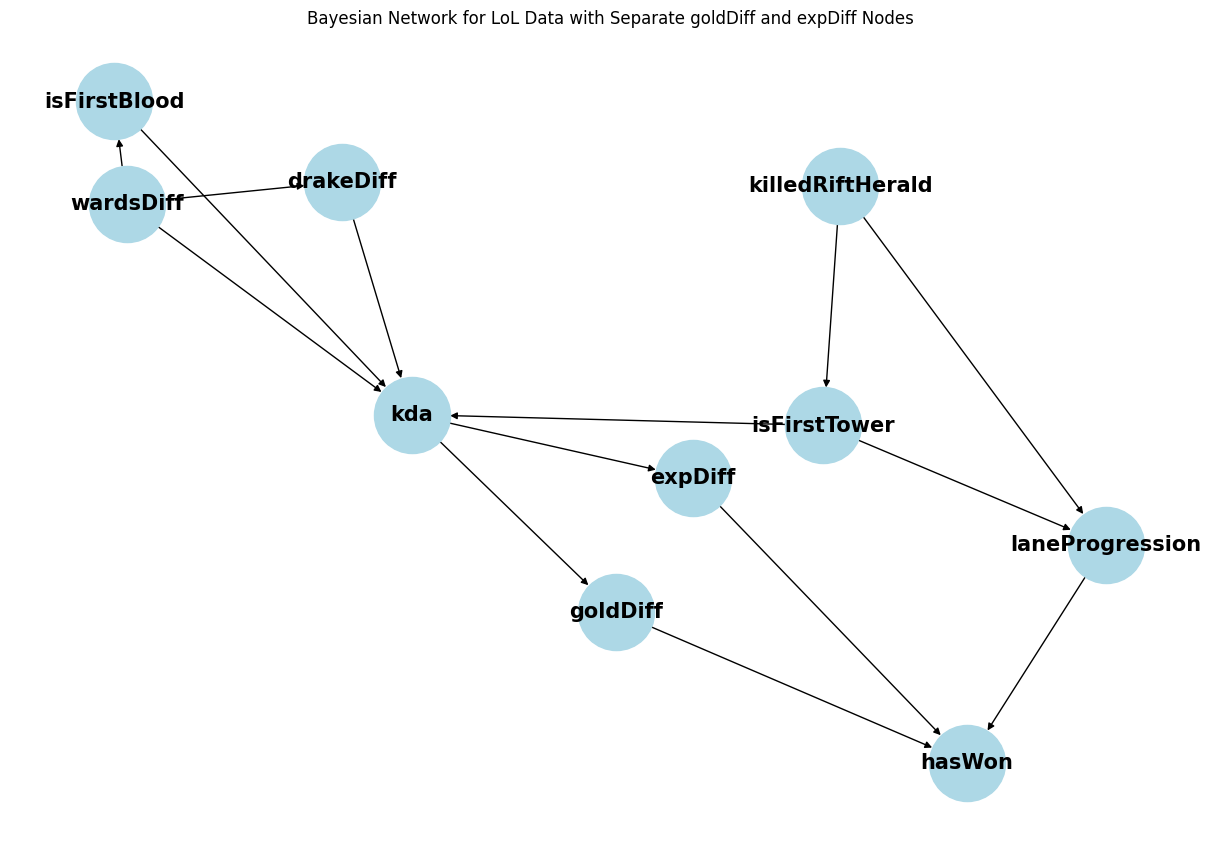

In [140]:
# Filter for frame=10
df_frame_10 = df[df['frame'] == 10].copy()

# Create derived columns
df_frame_10['kda'] = df_frame_10['kills'] + (df_frame_10['assists'] // 2) - df_frame_10['deaths']
df_frame_10['wardsDiff'] = df_frame_10['wardsPlaced'] - df_frame_10['wardsLost']

drake_columns_killed = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake']
drake_columns_lost = ['lostFireDrake', 'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake']
df_frame_10['drakeDiff'] = df[drake_columns_killed].sum(axis=1) - df[drake_columns_lost].sum(axis=1)

turrets_destroyed = ['destroyedTopOuterTurret', 'destroyedMidOuterTurret', 'destroyedBotOuterTurret']
turret_lost = ['lostTopOuterTurret', 'lostMidOuterTurret', 'lostBotOuterTurret']
df_frame_10['laneProgression'] = df[turrets_destroyed].sum(axis=1) - df[turret_lost].sum(axis=1)

# Discretize data
df_frame_10['goldDiff'] = (df_frame_10['goldDiff'] > 0).astype(int)
df_frame_10['expDiff'] = (df_frame_10['expDiff'] > 0).astype(int)
df_frame_10['wardsDiff'] = (df_frame_10['wardsDiff'] > 0).astype(int)
df_frame_10['drakeDiff'] = (df_frame_10['drakeDiff'] > 0).astype(int)
df_frame_10['kda'] = (df_frame_10['kda'] > 1).astype(int)
df_frame_10['killedRiftHerald'] = (df_frame_10['killedRiftHerald'] > 0).astype(int)
df_frame_10['laneProgression'] = (df_frame_10['laneProgression'] > 0).astype(int)

# Select relevant columns
df_bn = df_frame_10[['hasWon', 'goldDiff', 'expDiff', 'kda', 'wardsDiff', 'isFirstBlood', 'isFirstTower',
                     'killedRiftHerald', 'drakeDiff', 'laneProgression']]
print(df_bn.head(20))

# Define Bayesian network edges manually based on provided design with separate goldDiff and expDiff
edges = [
    ('kda', 'goldDiff'),
    ('kda', 'expDiff'),
    ('isFirstBlood', 'kda'),
    ('drakeDiff', 'kda'),
    ('wardsDiff', 'drakeDiff'),
    ('wardsDiff', 'isFirstBlood'),
    ('wardsDiff', 'kda'),
    ('isFirstTower', 'laneProgression'),
    ('laneProgression', 'hasWon'),
    ('killedRiftHerald', 'laneProgression'),
    ('killedRiftHerald', 'isFirstTower'),
    ('drakeDiff', 'kda'),
    ('isFirstTower', 'kda'),
    ('goldDiff', 'hasWon'),
    ('expDiff', 'hasWon')
]

# Calculating CPTs
P_hasWon_given_gd_ed_lp = df_bn.groupby(['goldDiff', 'expDiff', 'laneProgression'])['hasWon'].value_counts(normalize=True).unstack().fillna(0)
P_lp_given_ft_rh = df_bn.groupby(['isFirstTower', 'killedRiftHerald'])['laneProgression'].value_counts(normalize=True).unstack().fillna(0)
P_gd_given_k = df_bn.groupby('kda')['goldDiff'].value_counts(normalize=True).unstack().fillna(0)
P_ed_given_k = df_bn.groupby('kda')['expDiff'].value_counts(normalize=True).unstack().fillna(0)
P_k_given_fb_dd_wd_ft = df_bn.groupby(['isFirstBlood', 'drakeDiff', 'wardsDiff', 'isFirstTower'])['kda'].value_counts(normalize=True).unstack().fillna(0)
P_dd_given_wd = df_bn.groupby('wardsDiff')['drakeDiff'].value_counts(normalize=True).unstack().fillna(0)
P_fb_given_wd = df_bn.groupby('wardsDiff')['isFirstBlood'].value_counts(normalize=True).unstack().fillna(0)
P_ft_given_rh = df_bn.groupby('killedRiftHerald')['isFirstTower'].value_counts(normalize=True).unstack().fillna(0)
P_wd = df_bn['wardsDiff'].value_counts(normalize=True).to_dict()
P_rh = df_bn['killedRiftHerald'].value_counts(normalize=True).to_dict()

# Training our data
def predict_win_probability(evidence):
    # Extract evidence values
    gd, ed, lp = evidence['goldDiff'], evidence['expDiff'], evidence['laneProgression']
    k, wd, fb, ft, rh, dd = evidence['kda'], evidence['wardsDiff'], evidence['isFirstBlood'], evidence['isFirstTower'], evidence['killedRiftHerald'], evidence['drakeDiff']

    # Compute probability of winning and losing
    P_win = P_hasWon_given_gd_ed_lp.loc[gd, ed, lp][1]  # P(hasWon=1 | gd, ed, lp)
    P_lose = P_hasWon_given_gd_ed_lp.loc[gd, ed, lp][0]  # P(hasWon=0 | gd, ed, lp)

    # Multiply by other conditional probabilities
    P_win *= P_lp_given_ft_rh.loc[ft, rh][lp]
    P_lose *= P_lp_given_ft_rh.loc[ft, rh][lp]

    P_win *= P_gd_given_k.loc[k, gd]
    P_lose *= P_gd_given_k.loc[k, gd]

    P_win *= P_ed_given_k.loc[k, ed]
    P_lose *= P_ed_given_k.loc[k, ed]

    P_win *= P_k_given_fb_dd_wd_ft.loc[fb, dd, wd, ft][k]
    P_lose *= P_k_given_fb_dd_wd_ft.loc[fb, dd, wd, ft][k]

    P_win *= P_dd_given_wd.loc[wd, dd]
    P_lose *= P_dd_given_wd.loc[wd, dd]

    P_win *= P_fb_given_wd.loc[wd, fb]
    P_lose *= P_fb_given_wd.loc[wd, fb]

    P_win *= P_ft_given_rh.loc[rh, ft]
    P_lose *= P_ft_given_rh.loc[rh, ft]

    P_win *= P_wd[wd]
    P_lose *= P_wd[wd]

    P_win *= P_rh[rh]
    P_lose *= P_rh[rh]

    # Normalize probabilities
    total = P_win + P_lose
    P_win /= total
    P_lose /= total

    return {"P(hasWon=1)": P_win, "P(hasWon=0)": P_lose}

# Visualize the network
plt.figure(figsize=(12, 8))
G = nx.DiGraph(edges)
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=15, font_weight='bold')
plt.title('Bayesian Network for LoL Data with Separate goldDiff and expDiff Nodes')
plt.show()

In [139]:
# Testing
evidence = {
    'goldDiff': 1,
    'expDiff': 1,
    'laneProgression': 1,
    'kda': 1,
    'wardsDiff': 1,
    'isFirstBlood': 1,
    'isFirstTower': 1,
    'killedRiftHerald': 1,
    'drakeDiff': 1
}

result = predict_win_probability(evidence)
print(result)


{'P(hasWon=1)': np.float64(0.8838095238095238), 'P(hasWon=0)': np.float64(0.11619047619047619)}
